In [1]:
from util import load_user_data, task_ID_list_to_check
import pandas as pd
import numpy as np

valid_users, tp_data = load_user_data(folder_name="../anonymized_data", reserved_users=None)
user2condition = tp_data['user2condition']
condition_count = {}
for user in valid_users:
    tp_condition = user2condition[user]
    if tp_condition not in condition_count:
        condition_count[tp_condition] = 0
    condition_count[tp_condition] += 1
print(condition_count)

248 complete the NASA-TLX
248 complete the whole study
{'AP-AE': 63, 'AP-UE': 64, 'UP-AE': 61, 'UP-UE': 60}


In [2]:
user_task_confidence_dict = tp_data['confidence']
user_task_order = tp_data['task_order']
user_trust = tp_data['user_trust']
all_conditions = ["AP-AE", "AP-UE", "UP-AE", "UP-UE"]
data_long_format = {}
condition_count = {}
for condition in all_conditions:
    data_long_format[condition] = {
        "task_index": [],
        "confidence": [],
        "Decision": []
    }
    condition_count[condition] = 0

task_id_map = {
    'test-149': 1,
    'test-200': 2,
    'test-859': 3,
    'test-388': 4,
    'test-497': 5,
    'test-675': 6
}

In [7]:
variable_dict = {}
variable_dict["condition"] = []
variable_dict["confidence * trust - planning"] = []
variable_dict["confidence * trust - execution"] = []
for user in valid_users:
    tp_condition = user2condition[user]
    tp_task_order = user_task_order[user]
    for index, task_id in enumerate(tp_task_order):
        confidence_planning = user_task_confidence_dict[user][task_id]["planning"]
        confidence_execution = user_task_confidence_dict[user][task_id]["execution"]

        data_long_format[tp_condition]["task_index"].append(task_id_map[task_id])
        tp_trust = user_trust[user][task_id]['planning']
        if tp_trust == "Yes":
            tp_confidence = confidence_planning * 1.0
        else:
            tp_confidence = confidence_planning * -1.0
        data_long_format[tp_condition]["confidence"].append(confidence_planning)
        data_long_format[tp_condition]["Decision"].append("planning")
        variable_dict["condition"].append(tp_condition)
        variable_dict["confidence * trust - planning"].append(confidence_planning)

        data_long_format[tp_condition]["task_index"].append(task_id_map[task_id])
        tp_trust = user_trust[user][task_id]['execution']
        if tp_trust == "Yes":
            tp_confidence = confidence_execution * 1.0
        else:
            tp_confidence = confidence_execution * -1.0
        data_long_format[tp_condition]["confidence"].append(confidence_execution)
        data_long_format[tp_condition]["Decision"].append("execution")
        variable_dict["confidence * trust - execution"].append(confidence_execution)

In [8]:
df = pd.DataFrame(variable_dict)
print(df.shape)

(1488, 3)


/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/dabest/plotter.py:473: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  rawdata_plot = sns.swarmplot(data=plot_data, x=xvar, y=yvar,
/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 84.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 83.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 82.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ghe/

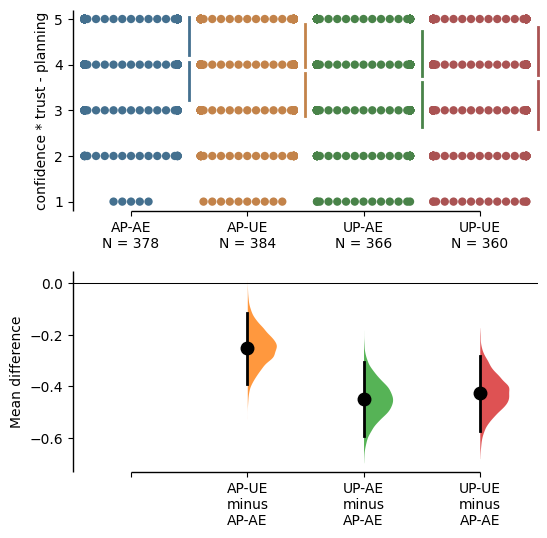

In [9]:
import dabest
# df["condition"].unique()
four_groups_unpaired = dabest.load(df, x="condition", idx=all_conditions, y="confidence * trust - planning", resamples=5000, ci=95, x1_level=all_conditions)
four_groups_unpaired.mean_diff.plot();

/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/dabest/plotter.py:473: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  rawdata_plot = sns.swarmplot(data=plot_data, x=xvar, y=yvar,
/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 85.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 83.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ghe/opt/anaconda3/envs/agreement_phi/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 82.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ghe/

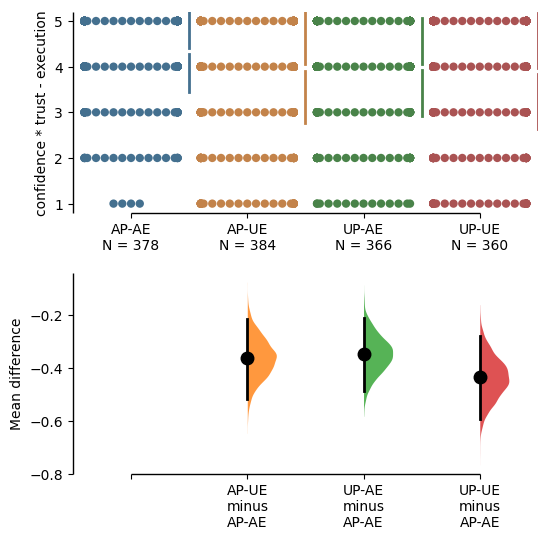

In [10]:
four_groups_unpaired = dabest.load(df, x="condition", idx=all_conditions, y="confidence * trust - execution", resamples=5000, ci=95, x1_level=all_conditions)
four_groups_unpaired.mean_diff.plot();